# Required Packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve,
                             log_loss, silhouette_score, calinski_harabasz_score, davies_bouldin_score, adjusted_rand_score,
                             normalized_mutual_info_score, homogeneity_score, completeness_score, v_measure_score, fowlkes_mallows_score)
from sklearn.metrics.cluster import contingency_matrix
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Import and Split The Data

In [2]:
dataset = pd.read_csv('../data/creditcard.csv')
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=44)

## Take a quick look

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
dataset.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

# Preprocessing, Clustering(KMeans) and Classification(LogisticRegression) Models, Using Pipelines

In [5]:
clustering_model = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('clustering', KMeans(n_clusters=2, n_init=20))
])

classification_model = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('classification', LogisticRegression(max_iter=1000))
])

# Fitting & Predicting 

In [6]:
clustering_model.fit(X_train)
y_pred_clustering = clustering_model.predict(X_test)
classification_model.fit(X_train, y_train)
y_pred_classification = classification_model.predict(X_test)

# Evaluation of the Classification Model 

### Metrics

In [7]:
y_pred_proba = classification_model.predict_proba(X_test)[:, 1]

conf_matrix = confusion_matrix(y_test, y_pred_classification)
accuracy = accuracy_score(y_test, y_pred_classification)
precision = precision_score(y_test, y_pred_classification)
recall = recall_score(y_test, y_pred_classification)
f1 = f1_score(y_test, y_pred_classification)
roc_auc = roc_auc_score(y_test, y_pred_proba)
log_loss = log_loss(y_test, y_pred_proba)

print(f"Confusion Matrix: \n{conf_matrix}")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall:.16f}")
print(f"F1 Score: {f1}")
print(f"ROC AUC Score: {roc_auc}")
print(f"Log Loss: {log_loss}")

Confusion Matrix: 
[[56851    11]
 [   48    52]]
Accuracy: 0.9989642217618764
Precision: 0.8253968253968254
Recall: 0.5200000000000000
F1 Score: 0.6380368098159509
ROC AUC Score: 0.9783444127888572
Log Loss: 0.00448578500519743


### ROC Curve

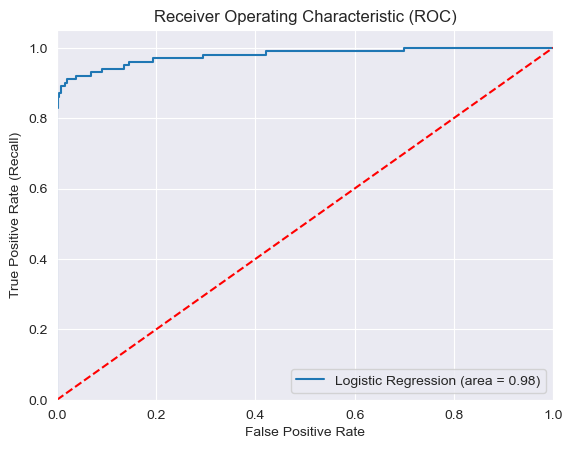

In [8]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# Evaluation of the Clustering Model 

### Intrinsic Methods

In [9]:
silhouette_avg = silhouette_score(X_test, y_pred_clustering)
Calinski_Harabasz = calinski_harabasz_score(X_test, y_pred_clustering)
Davies_Bouldin = davies_bouldin_score(X_test, y_pred_clustering)
kmeans = clustering_model.named_steps['clustering']
WCSS = kmeans.inertia_

print(f"The average silhouette_score is : {silhouette_avg}")
print(f"The Calinski-Harabasz Index is : {Calinski_Harabasz}")
print(f"The Davies-Bouldin Index is : {Davies_Bouldin}")
print(f"The within-cluster sum of squares is : {WCSS}")

The average silhouette_score is : 0.6120710264309411
The Calinski-Harabasz Index is : 137362.56395502645
The Davies-Bouldin Index is : 0.4871715649864342
The within-cluster sum of squares is : 6520091.88401845


### Extrinsic Methods

In [10]:
ari = adjusted_rand_score(y_test, y_pred_clustering)
nmi = normalized_mutual_info_score(y_test, y_pred_clustering, average_method='arithmetic')
homogeneity = homogeneity_score(y_test, y_pred_clustering)
completeness = completeness_score(y_test, y_pred_clustering)
v_measure = v_measure_score(y_test, y_pred_clustering)
Fowlkes_Mallows = fowlkes_mallows_score(y_test, y_pred_clustering)
contingency = contingency_matrix(y_test, y_pred_clustering)

print(f"Adjusted Rand Index (ARI): {ari}")
print(f"Normalized Mutual Information (NMI): {nmi}")
print(f"Homogeneity: {homogeneity}")
print(f"Completeness: {completeness}")
print(f"V-measure: {v_measure}")
print(f"Fowlkes-Mallows Index: {Fowlkes_Mallows}")
print(f"Contingency Matrix:\n{contingency}")

Adjusted Rand Index (ARI): -4.5092453261784816e-05
Normalized Mutual Information (NMI): 1.5199054130875775e-05
Homogeneity: 0.0004141522322415978
Completeness: 7.741581984475504e-06
V-measure: 1.5199054130875776e-05
Fowlkes-Mallows Index: 0.7082453067648553
Contingency Matrix:
[[30774 26088]
 [   58    42]]


### Visualization Technics

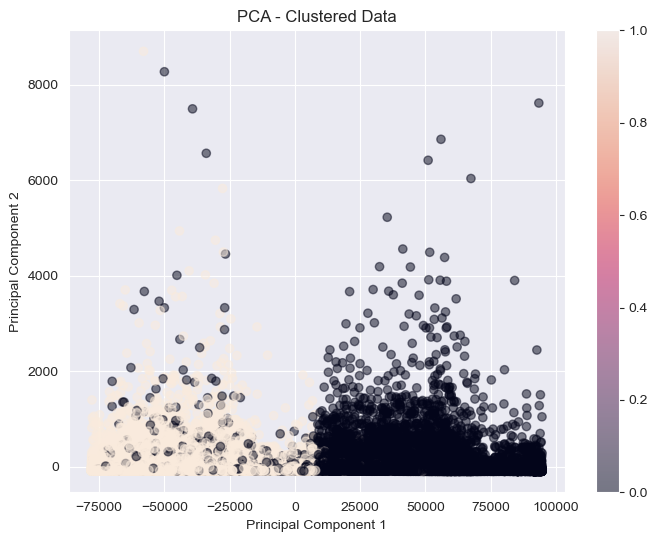

In [11]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

y_pred_clustering = clustering_model.predict(X_test)

plt.figure(figsize=(8, 6))
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_pred_clustering, alpha=0.5)
plt.title('PCA - Clustered Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar()
plt.show()

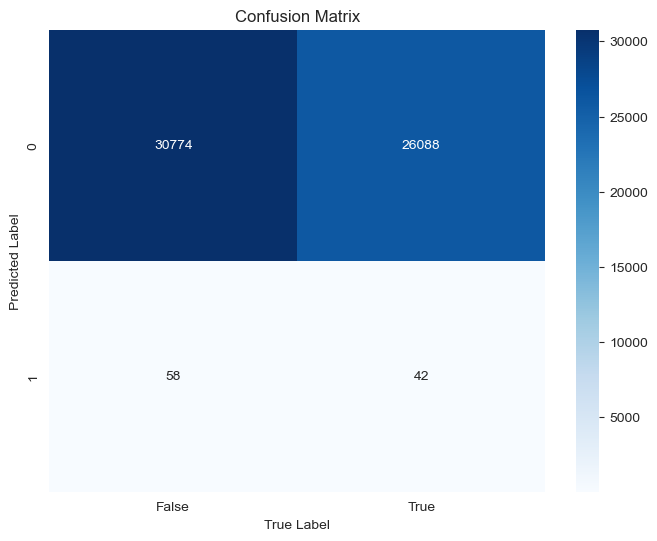

42

In [12]:
binary_predicted_labels = y_pred_clustering

cm = confusion_matrix(y_test, binary_predicted_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True Label')
plt.ylabel('Predicted Label')

plt.xticks([0.5, 1.5], ['False', 'True'])
plt.yticks([0.5, 1.5], ['0', '1'])
plt.show()

((y_test == y_pred_clustering) & (y_test == 1)).sum()

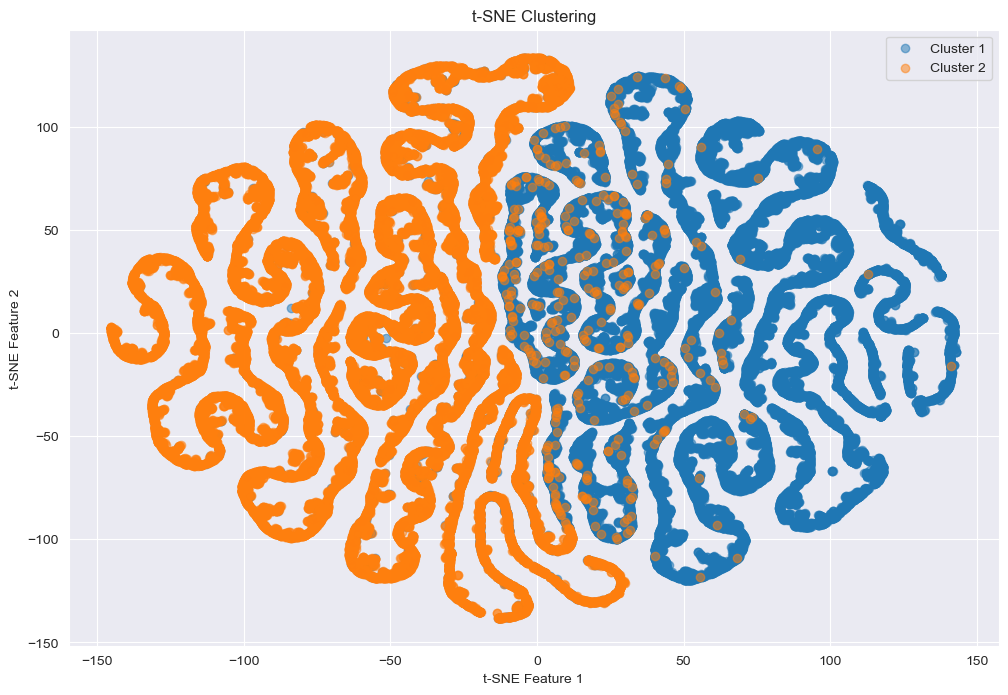

In [13]:
tsne = TSNE(n_components=2, random_state=42)
X_test_tsne = tsne.fit_transform(X_test)

y_pred_clustering = clustering_model.predict(X_test)

plt.figure(figsize=(12, 8))
plt.scatter(X_test_tsne[y_pred_clustering == 0, 0], X_test_tsne[y_pred_clustering == 0, 1], label='Cluster 1', alpha=0.5)
plt.scatter(X_test_tsne[y_pred_clustering == 1, 0], X_test_tsne[y_pred_clustering == 1, 1], label='Cluster 2', alpha=0.5)

plt.title('t-SNE Clustering')
plt.xlabel('t-SNE Feature 1')
plt.ylabel('t-SNE Feature 2')
plt.legend()
plt.show()